### 这节我们主要学习


+ 1.机器学习常见的 python 包
+ 2.梯度下降法代码实现


In [1]:
# 导入工具包
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 生成数据
x_data = [338.,333.,328.,207.,226.,25.,179.,60.,208.,606.]
y_data = [640.,633.,619.,393.,428.,27.,193.,66.,226.,1591.]
# ydata = b + w * xdata

In [3]:
x = np.arange(-200,-100,1) # bias
y = np.arange(-5,5,0.1) # weight
z = np.zeros((len(x),len(y)))
X,Y = np.meshgrid(x,y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        z[j][i] = 0
        for n in range(len(x_data)):
             z[j][i] = z[j][i] + (y_data[n]-b-w*x_data[n])**2
        z[j][i] = z[j][i]/len(x_data)

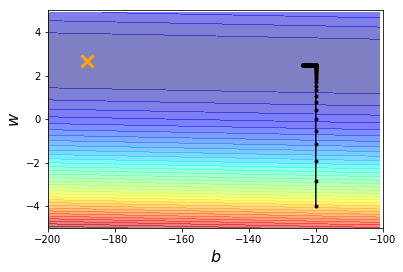

In [4]:
# ydata = b + w * xdata
b = -120 # initial b
w = -4  # inital w
lr = 0.0000001 # learning rate
iteration = 100000

# store initial values for plotting
b_history = [b]
w_history = [w]

# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
        
    # update parameters
    b = b - lr * b_grad
    w = w - lr * w_grad
    
    # Store parameters for plotting 
    b_history.append(b)
    w_history.append(w)
    
# plot the figure
plt.contourf(x,y,z,50,alpha=0.5,cmap=plt.get_cmap('jet'))
# plt.contourf(x,y,z,50,alpha=0.5,cmap='jet')
plt.plot([-188.4],[2.67],'x',ms=12,markeredgewidth=3,color='orange')
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()   

上图中，横轴代表 b 的变化，纵轴代表 w 的变化，不同颜色的 w 和 b 我们可以得到不同的损失函数值，损失函数最低的点是上图的叉号位置，该点的 w 位于 (2,4) 之间，b 位于 (-200,-180) 之间。初始时 w 和 b 就在黑线的右下方，然后一直变化向上走，然后左转；迭代 10 万次以后发现还未到 loss 最低点，故我们学习率设置太低，现在去调大学习率，视频中学习率先是 10 倍的扩大，这里我就不演示了，直接扩大 100 倍后看看情况。

+ 学习率扩大 100 倍


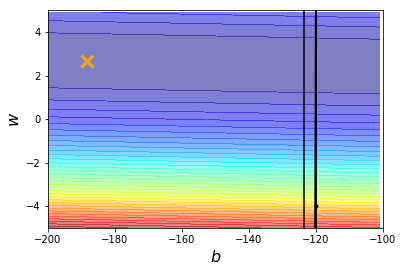

In [5]:
# ydata = b + w * xdata
b = -120 # initial b
w = -4  # inital w
lr = 0.00001 # learning rate
iteration = 100000

# store initial values for plotting
b_history = [b]
w_history = [w]

# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
        
    # update parameters
    b = b - lr * b_grad
    w = w - lr * w_grad
    
    # Store parameters for plotting 
    b_history.append(b)
    w_history.append(w)
    
# plot the figure
plt.contourf(x,y,z,50,alpha=0.5,cmap=plt.get_cmap('jet'))
# plt.contourf(x,y,z,50,alpha=0.5,cmap='jet')
plt.plot([-188.4],[2.67],'x',ms=12,markeredgewidth=3,color='orange')
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()

此时学习率太大，直接跑出图片范围以外了。

那我们该如何设置学习率呢？

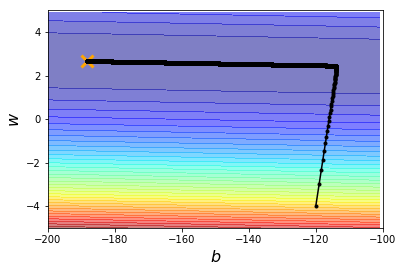

In [6]:
# ydata = b + w * xdata
b = -120 # initial b
w = -4  # inital w
lr = 1 # learning rate
iteration = 100000

# store initial values for plotting
b_history = [b]
w_history = [w]

# 给w b 特制化一个学习率
lr_b = 0
lr_w = 0

# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    
    # update parameters
    b = b - lr/np.sqrt(lr_b) * b_grad
    w = w - lr/np.sqrt(lr_w) * w_grad
    
    # Store parameters for plotting 
    b_history.append(b)
    w_history.append(w)
    
# plot the figure
plt.contourf(x,y,z,50,alpha=0.5,cmap=plt.get_cmap('jet'))
# plt.contourf(x,y,z,50,alpha=0.5,cmap='jet')
plt.plot([-188.4],[2.67],'x',ms=12,markeredgewidth=3,color='orange')
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()

以上学习率采用的 AdaGrad 方式进行更新，感兴趣的可以自己先了解一下。现在我们把学习率设置为 1，

结果如图：从初始值到终点我们就很容易实现了。